In [1]:
from imutils import face_utils
import numpy as np
import imutils
import dlib
import cv2
import matplotlib.pyplot as plt
import face_recognition
import os
from imutils import paths

def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")
    plt.show()

In [2]:
# http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
predictor = dlib.shape_predictor("shape_predictor_81_face_landmarks.dat")
detector = dlib.get_frontal_face_detector()

In [264]:
frame = cv2.imread("./imgs/suzy.jpg")
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
rects = detector(gray, 0)  
print("Number of faces detected: {}".format(len(rects)))
for r in rects :
    print(r)

Number of faces detected: 1
[(108, 194) (366, 452)]


Detection 0: Left: 108 Top: 194 Right: 366 Bottom: 452


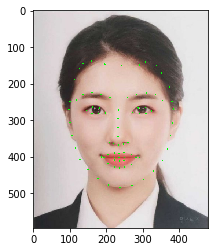

In [265]:
for k, d in enumerate(rects):
        print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(
            k, d.left(), d.top(), d.right(), d.bottom()))
        shape = predictor(gray, d)
        shape = face_utils.shape_to_np(shape) #객체 내에서 필요한 좌표 정보만 넘파이 객체로 뽑음
        for (x, y) in shape:
          cv2.circle(frame, (x, y), 2, (0, 255, 0), -1)

imshow("", frame)

In [158]:
import math

# 거리구하기
def distance(p1,p2):
    x = p2[0] - p1[0]    # x좌표 길이
    y = p2[1] - p1[1]    # y좌표 길이
    distance = math.sqrt((x * x) + (y * y))
    return distance

def ratio2(a,b):
    ratio = [a/a, b/a]
    return "{:.2f} : {:.2f}".format(ratio[0], ratio[1])

def ratio3(a,b,c):
    ratio = [a/a, b/a, c/a]
    return "{:.2f} : {:.2f} : {:.2f}".format(ratio[0], ratio[1], ratio[2])

In [201]:
# [1] 눈:눈사이:눈 = 1:1:1 

left_eye = distance(shape[36], shape[39])
# between_eyes = distance(shape[42], shape[39])
between_eyes = (distance(shape[31], shape[35]) + distance(shape[42], shape[39]))*0.5
right_eye = distance(shape[45], shape[42])

In [202]:
ratio3(left_eye, between_eyes, right_eye)

# 주빈 --> 눈:눈사이:눈 = 1.0, 1.46, 0.97 / 1.00 : 1.19 : 0.97
# 태희 --> 눈:눈사이:눈 = 1.0, 1.37, 1.01 / 1.00 : 1.15 : 1.01
# 수지 --> 눈:눈사이:눈 = 1.0, 1.46, 1.0  / 1.00 : 1.23 : 1.00

'1.00 : 1.19 : 0.97'

In [137]:
# [2] 이마:중안부:하안부 = 1:1:1
forehead = distance(shape[71], shape[27])
midsection = distance((shape[21]+shape[22])*0.5, shape[33])
lowersection = distance(shape[33], shape[8])

In [138]:
ratio3(forehead, midsection, lowersection)

# 주빈 --> 1.00 : 1.05 : 0.91
# 태희 --> 1.00 : 1.03 : 0.84
# 수지 --> 1.00 : 1.06 : 0.95

'1.00 : 1.05 : 0.91'

In [159]:
# [3] 인중:턱 = 1:2
philtrum = distance(shape[33], shape[62])
jaw = distance(shape[62], shape[8])

In [160]:
ratio2(philtrum, jaw)

# 주빈 --> 1.00 : 1.90
# 태희 --> 1.00 : 1.92
# 수지 --> 1.00 : 2.31

'1.00 : 2.31'

In [252]:
# [4] 얼굴 가로:얼굴 세로 = 1:1.618 ---> 머리통까지 포함된 비율이므로 조정필요
#                         1:1.3
width = distance(shape[1], shape[15])
length = distance((shape[69]+shape[72])*0.5, shape[8])

In [253]:
ratio2(width, length)

# 주빈 --> 1.00 : 1.43 / 1.00 : 1.27
# 태희 --> 1.00 : 1.50 / 1.00 : 1.31
# 수지 --> 1.00 : 1.37 / 1.00 : 1.23

'1.00 : 1.27'

In [266]:
# [5] 코:입술 = 1:1.618

nose = distance(shape[31], shape[35])
#nose = (distance(shape[31], shape[35]) + distance(shape[42], shape[39]))*0.5
mouth = distance(shape[48], shape[54])

In [267]:
ratio2(nose, mouth)

# 주빈 --> 1.00 : 1.97 / 1.00 : 1.52
# 태희 --> 1.00 : 1.96 / 1.00 : 1.57
# 수지 --> 1.00 : 2.02 / 1.00 : 1.63

'1.00 : 2.02'

In [229]:
# [6] 얼굴 가로:하관 가로 = 1:0.8

width = distance(shape[0], shape[16])
lower_width = distance(shape[4], shape[12])

In [230]:
ratio2(width, lower_width)

# 주빈 --> 1.00 : 0.78
# 태희 --> 1.00 : 0.76
# 수지 --> 1.00 : 0.78

'1.00 : 0.78'

In [254]:
# 분석 결과,
# [1] 눈:눈사이:눈 = 1:1:1 
# 1) 이상적인 비율
# 2-1) 눈 사이가 가까워요   1:0.8:1
# 2-2) 눈 사이가 멀어요     1:1.3:1
# 3-1) 오른쪽 눈이 더 커요  1:__:1.2
# 3-2) 왼쪽 눈이 더 커요    1:__:0.8


# [2] 이마:중안부:하안부 = 1:1:1
# 1) 이상적인 비율
# 2-1) 중안부가 긴 편이에요     (이마+하안부)*0.5 < 중안부
# 2-2) 중안부가 짧은 편이에요   (이마+하안부)*0.5 > 중안부
# 3-1) 하안부가 긴 편이에요     (이마+중안부)*0.5 < 하안부 
# 3-2) 하안부가 짧은 편이에요   (이마+중안부)*0.5 > 하안부
# 4-1) 이마가 좁은 편이에요     (중안부+하안부)*0.5 > 이마
# 4-2) 이마가 넓은 편이에요     (중안부+하안부)*0.5 < 이마

# [3] 인중:턱 = 1:2
# 1) 이상적인 비율
# 2-1) 턱에 비해 인중이 긴 편이에요     1:1.7
# 2-2) 턱에 비해 인중이 짧은 편이에요   1:2.3

# [4] 얼굴 가로:얼굴 세로 = 1:1.3
# 1) 이상적인 비율
# 2) 얼굴이 긴 편이에요   1:1.4
# 3) 얼굴이 짧은 편이에요 1:1.2

# [5] 코:입술
# 1) 이상적인 비율
# 2-1) 입술이 큰 편이에요     1:2.1
# 2-2) 입술이 작은 편이에요   1:1.8
# 3-1) 코가 큰 편이에요
# 3-2) 코가 작은 편이에요
# ------------------ 코 비율?


# [6] 얼굴 가로:하관 가로 = 1:0.8
# 1) 이상적인 비율
# 2-1) 하안부가 넓은 편이에요  1:0.9
# 2-2) 하안부가 좁은 편이에요  1:0.6